# 2. PCA on Olevitti Images


In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
oliv = datasets.fetch_olivetti_faces()

In [3]:
oliv

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [4]:
## here, we have data and we have images. 
## now we look at keys

oliv.keys()

## we have 4 things including images.

dict_keys(['data', 'images', 'target', 'DESCR'])

In [5]:
## lets look at the shape of the data. 
oliv['data'].shape
## this means we have 400 pixels of image and 4096 pixels.
## it means we have 400 rows and 4096 columns and these 4096 columns are representing pixels of our images.  

(400, 4096)

In [6]:
## lets look at the shape of images
oliv['images'].shape

## this shows that we have 400 images each of size 64x64. And data is nothing but flattened each image into an array. 

(400, 64, 64)

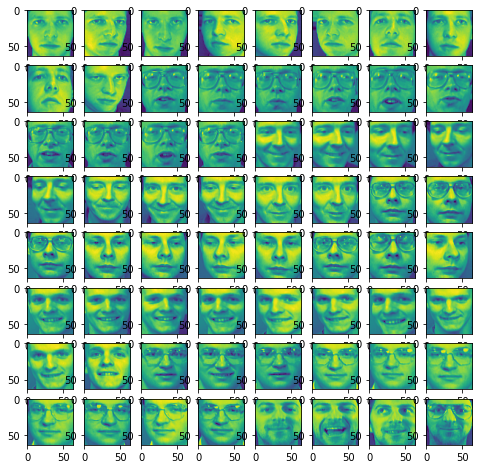

In [7]:
## we need to draw this image and see what they are.  
fig = plt.figure(figsize = (8,8))  # once we have the figure, we can add the subplots in the figure.  

## now we need 8 rows and 8 columns and we going to have each cell and each image.So we will have 64 images.  
## so we add subplot and show image in it.
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)  # we give three things no of rows, no of columns and position
    ax.imshow(oliv.images[i])
plt.show()

## looks like it is not a natural image, its a bit green.  
## If we look closely, first 10 images are of the same person, and so on.  
## So this dataset is about 40 different people with 10 images each



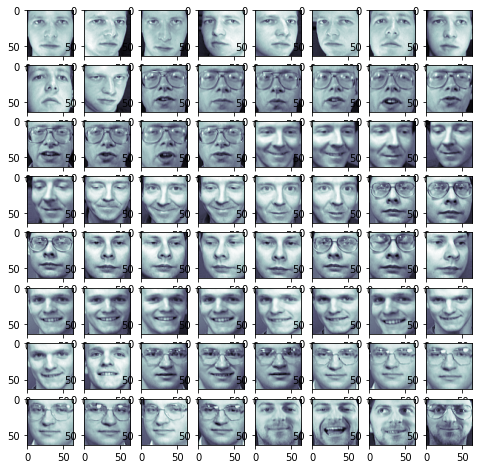

In [8]:
## SO if we want to change the way this images looks like, within imshow, the colormap we want should be different 

fig = plt.figure(figsize = (8,8))

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)  # we give three things no of rows, no of columns and position
    ax.imshow(oliv.images[i], cmap = plt.cm.bone)  # cmap will change the image the way it looks like
plt.show()

## if we look closely, we see there is 0 and 50 added at the corner of the image, it is xticks and yticks.  
## we can also get rid of these ticks. 

**Now we want to apply PCA on these images So first of all PCA requires the data to be in the form of 2d array.  
So while plotting, we were using oliv.images, now we will use oliv.data.**

In [9]:
x = oliv.data
y = oliv.target

In [10]:
## creating pca object
pca = PCA()
pca.fit(x)

## how many pca components hsould we have? So lets say we have a data with 13 features , if we dont pass n_components, 
## it will create 13 different components.  
## But in this case what should be size and shape of the component?
## So we look at all these components. 

PCA()

In [11]:
pca.components_


array([[-0.00419152, -0.00710946, -0.00933617, ...,  0.00018519,
         0.00337968,  0.00318828],
       [-0.02859164, -0.03328821, -0.03784624, ...,  0.02962781,
         0.02721297,  0.02488897],
       [ 0.00135659, -0.00032579, -0.00019771, ..., -0.01541373,
        -0.01370986, -0.01188348],
       ...,
       [ 0.00223517,  0.02056838,  0.0151594 , ..., -0.01273594,
        -0.05848993, -0.07650334],
       [ 0.01714869,  0.02917847, -0.0094252 , ...,  0.00159123,
         0.01249396, -0.00815191],
       [-0.00478715,  0.01267752,  0.01728035, ..., -0.01136206,
        -0.01625577, -0.00547431]], dtype=float32)

**What should be the shape of these components?  
lets say we have 2000 * 13 data. 
If we apply pca without n_components, what should be the shape of this component?  
It should be 13 components because pca keeps all the components if n_components is not passed. 
And within those 13 components, each component is basically a unit vector in the original 13 dimensional space.  
Lets say we have 2d data, and if we apply PCA, 2 components will retrun unless of we ask to convert it into 
1d , its going to find components and each component is the unit vector in the original space that we have.  
But right now, we have 400 x 4096 which means we have 4096 features, so we have 4096 components and each component should be of length 4096. But thats not how things work. If we look at no of components that we have, it will actually is 400.If we look at documentation, the default value of no of component is mimimum of 400x 4096.  
SO if we have 4096 datapoints, it will not create 4096 components, it will create only 400 components. So the shape of this metric is 400 component and each component will be of 4096 length because the length of each eigen vector that we have.**  


In [12]:
pca.components_.shape

(400, 4096)

**Now we define the optimal value of n_component**

In [13]:
k= 0
total = sum(pca.explained_variance_)
current_sum = 0
while current_sum/total < 0.95:
    current_sum += pca.explained_variance_[k]
    k+= 1
    
k

123

**It is saying we need to keep 260 components. 
So pca give us 400 but originally we had 4096 now its saying we need to keep 260 as it contains 99% of the data.  
But if we keep 95% as variance, it says we need only 123 features.**

In [14]:
pca = PCA(n_components = k)
transformed_data = pca.fit_transform(x)
transformed_data.shape

## So now we have 400 images that we had but each of these image is only 123 dimensional and we maintained 95% of data.
## What we want to understand is how many principal component PCA is going to find for us.
## Its actually going to be equal no of datapointsbecause we have lesser number of datapoints than the no of features that we
## have.

(400, 123)

# 3. Reproducing Images
In PCA, when we are applying PCA on images, when youre applying n_comonents, there is one option whiten = False.  
In case of Images, we try and keep this to be True and check whether it is leading to better result or not.  
Its kind of like feature scaling,once we keep whiten as True, whats going to happen is this 123 new features that we have,  
they will be reduced to 0 mean and unit variance(theyll have same variance among 123 features).  
Sometimes it helps sometimes it might not help.  

In [15]:
pca = PCA(n_components = k, whiten = True)
transformed_data = pca.fit_transform(x)
transformed_data.shape

(400, 123)

In [16]:
# Lets get the images back, lets get the approximation from this lower dimensional data.  
x_approx = pca.inverse_transform(transformed_data)

In [17]:
x_approx.shape
## Now we get the original size data back. Its not going to be exactly same data because we have lost some.
## We can try and plot it to see if the image is still intact.

(400, 4096)

**Now to draw Images, we have this 400x4096 data, but to draw it, we would need it to be 64x64.  
So we will have to reshape the data**

In [18]:
x_approx_images = x_approx.reshape((400, 64, 64))  ## reshaping the images on its same size.(We need to be careful
                                                    ## on this reshape part so we must apply the size in which the original
                                                        ## image is.)



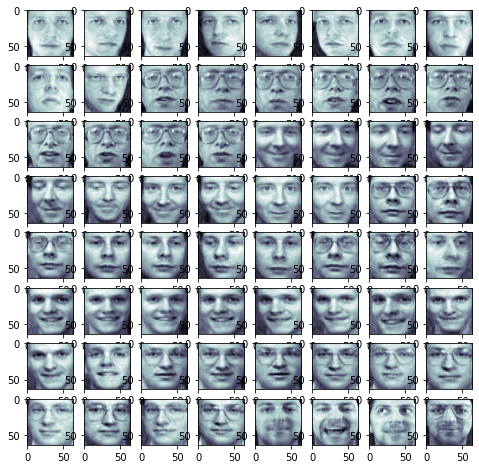

In [19]:
fig = plt.figure(figsize = (8,8))

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)  # we give three things no of rows, no of columns and position
    ax.imshow(x_approx_images[i], cmap = plt.cm.bone)
plt.show()

**We are getting our images even after getting the size from 4096 to 123.  
So we still have the data intact with us.**

# 4 Eigenfaces

EigenVectors are the Principal component that we have after applying PCA.  
We have produced 123 dimensions that means we have 123 principal components.  
So if we talk about 1 principle component in this, lets say the first component.  
This first component is 4096 sized.  
Why? Because if we have a 2d data,  if we look at the first component, it would be a unit vector in this 2d space.  
For unit vector, sum of squares is 1.  
So lets say we have a matrix which is a vector,
$\begin{bmatrix}
2 \\
3 \\
\end{bmatrix}$ which representing our principle component 1.  
This basically means value of $x_{1}$ is 2 and value of $x_2$ is 3.  
Now this foorst component we have has 4096 values. That means we have $x_1$ to $x_{4096}$ features and we have values to each corrosponding features $->$ $\begin{bmatrix}
x_1 \\
x_2 \\
.  \\
. \\
. \\
x_{4096}
\end{bmatrix}$.  
So for the first component we know what is the feature, and what is the value of component $x_{4096}$.   
What was $x_1$? $x_1$ is the FIRST PIXEL IN ANY IMAGE. What was $x_{4096}$? IT IS THE LAST PIXEL OF THE ANY IMAGE.  
So we can say that $x_{1}$ which has some pixel value and so on.  
Lets try to draw this component. 


In [20]:
## we have our eigen vectors. 
eigenv = pca.components_
eigenv.shape

(123, 4096)

**SO we will reshape them and call them EigenFaces**

In [21]:
eigenfaces = eigenv.reshape((123, 64, 64))
## why 123, because we are using the transformed data and eigenvectors are only there when we transform data.
## so eigenvectors are there only in transformed data.

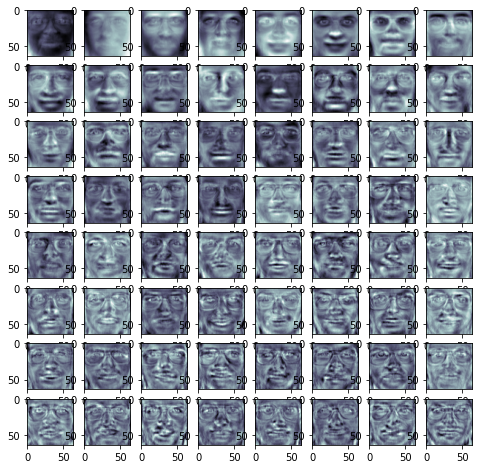

In [22]:
## now we will plot this. 
fig = plt.figure(figsize = (8,8))

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)  # we give three things no of rows, no of columns and position
    ax.imshow(eigenfaces[i], cmap = plt.cm.bone)
plt.show()

**If we look at it it does not look like random data, it looks like faces thats why we call them EigenFaces. Each component is seems to make something similar to a face.  
So each new component that we have, is actually representing some particular features of an image.  
So these eigenfaces are focusing on some of the aspects of the face if we look carefully.**